In [1]:
import pandas as pd
import numpy as np
from pyforest import *

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd .read_csv('test_lAUu6dG.csv')

In [3]:
train.shape

(614, 13)

In [4]:
test.shape

(367, 12)

In [5]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [6]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [7]:
train.Loan_Status.value_counts()[0]/train.shape[0] #loan approval ratio

0.6872964169381107

In [8]:
train.Loan_Status.value_counts().plot(kind = 'bar')
plt.show()

<Figure size 640x480 with 1 Axes>

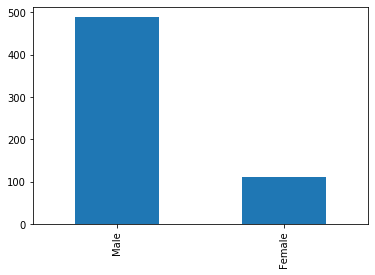

In [9]:
#gender
train.Gender.value_counts().plot(kind = 'bar')


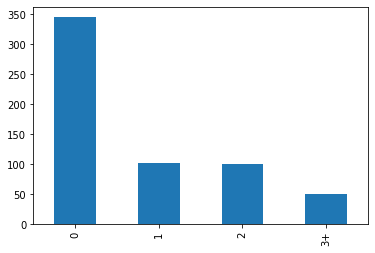

In [15]:
#depedence
train.Dependents.value_counts().plot(kind = 'bar')

In [10]:
#3+ replace
train.Dependents.replace(to_replace ="3+" , value=3, inplace=True)

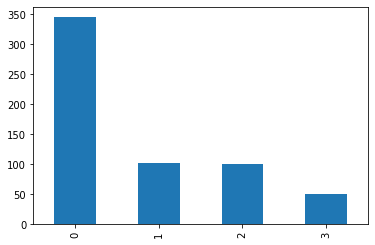

In [11]:
train.Dependents.value_counts().plot(kind = 'bar')

In [12]:
train.Education.value_counts()
#graduate are more as compared to non graduate

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
train.Self_Employed.value_counts()
#more salary people in loan process rather than self employed

No     500
Yes     82
Name: Self_Employed, dtype: int64

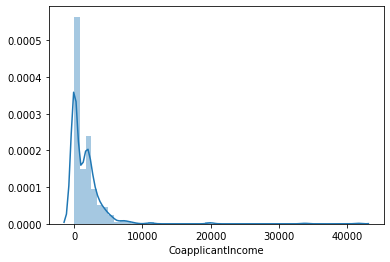

In [14]:
sns.distplot(train.CoapplicantIncome)
#income is skewed in nature

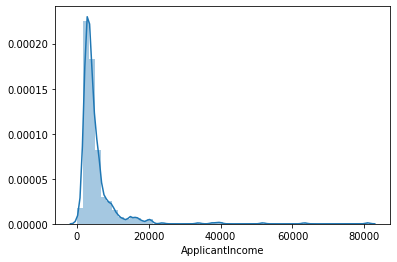

In [15]:
sns.distplot(train.ApplicantIncome)
#income is skewed in nature

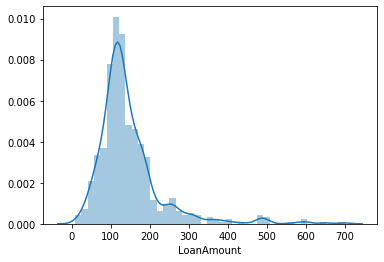

In [16]:
sns.distplot(train.LoanAmount.dropna()) #dropna is used for instance to remove null values and plot

In [68]:
train.Loan_Amount_Term.value_counts()
#repayment is mostly of 360 months(30yrs)

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
train.isnull().sum()



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
#drop Nas
newtrain=train.dropna()

In [20]:
newtrain.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

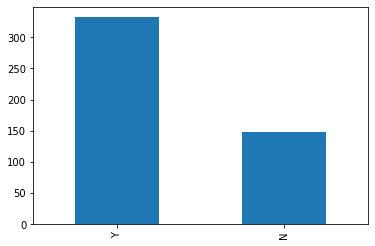

In [21]:
newtrain.Loan_Status.value_counts().plot(kind="bar") #check the loanstatus in new train

In [22]:
#replacing Y and N
newtrain.Loan_Status.replace(to_replace=["Y","N"] , value=[1,0],inplace=True)

C:\Users\Shweta\Anaconda\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
#OHE
dummytrain=pd.get_dummies(newtrain.drop("Loan_ID",axis=1))

In [24]:
dummytrain.shape

(480, 21)

In [25]:
#split the nnew train in train and test
from sklearn.model_selection import train_test_split
y=dummytrain.Loan_Status
x=dummytrain.drop("Loan_Status", axis=1)

In [26]:
#split
xtrain,xtest, ytrain,ytest = train_test_split(x,y, test_size = 0.25, random_state = 123)

# RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy")

In [28]:
pred=rf.fit(xtrain,ytrain).predict(xtest)

C:\Users\Shweta\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# accuracy_score,classification_report,
 ## confusion_matrix,cohen_kappa_score

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score

In [30]:
accuracy_score(ytest,pred)

0.75

In [31]:
print("The accuracy Score is {}".format(accuracy_score(ytest,pred)))
print("cohen's kappa {}".format(cohen_kappa_score(ytest,pred))) #shouldn't be less then 0.5

The accuracy Score is 0.75
cohen's kappa 0.4346733668341709


In [32]:
print("The classification_report is {}".format(classification_report(ytest,pred)))

The classification_report is               precision    recall  f1-score   support

           0       0.71      0.55      0.62        44
           1       0.77      0.87      0.81        76

    accuracy                           0.75       120
   macro avg       0.74      0.71      0.72       120
weighted avg       0.74      0.75      0.74       120



Search Results
Featured snippet from the web
Image result for what is classification report in machine learning
A Classification report is used to measure the quality of predictions from a classification algorithm. 
How many predictions are True and how many are False. More specifically, True Positives, False Positives, 
True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

The f1-score gives you the harmonic mean of precision and recall. 
The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.
The support is the number of samples of the true response that lie in that class.

#precision
Precision is the ability of a classiifer not to label an instance positive that is actually negative. 
For each class it is defined as as the ratio of true positives to the sum of true and false positives.
Said another way, “for all instances classified positive, what percent was correct?”

#recall
Recall is the ability of a classifier to find all positive instances.
For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. 
Said another way, “for all instances that were actually positive, what percent was classified correctly?”

#f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.
As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

#support
Support is the number of actual occurrences of the class in the specified dataset.
Imbalanced support in the training data may indicate structural weaknesses in the 
reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. 
Support doesn’t change between models but instead diagnoses the evaluation process.

In [33]:
!pip install imblearn

In [34]:
#synthectic minority over sampling technique-SMOTE
from imblearn.over_sampling import SMOTE

In [35]:
#SMOTE to focus on minority ratio
sm=SMOTE(ratio="minority")

In [51]:
#SMOTE applied on training set
xtrain_reset, ytrain_reset=sm.fit_sample(xtrain,ytrain)
#SMOTE applied on test set
xtest_reset, ytest_reset=sm.fit_sample(xtest,ytest)

In [52]:
print("no. of 1s=",sum(ytrain==1))#count of 1s
print("no. of 0s",sum(ytrain==0))#count of 0s

no. of 1s= 256
no. of 0s 104


In [53]:
print("reset no. of 1s=",sum(ytrain_reset==1))
print("reset no. of 0s=",sum(ytrain_reset==0))

reset no. of 1s= 256
reset no. of 0s= 256


In [54]:
pred=rf.fit(xtrain_reset,ytrain_reset).predict(xtest_reset)

C:\Users\Shweta\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
print("cohen's kappa {}".format(cohen_kappa_score(ytest_reset,pred)))

cohen's kappa 0.631578947368421


In [56]:
print("The accuracy Score is {}".format(accuracy_score(ytest_reset,pred)))

The accuracy Score is 0.8157894736842105


In [65]:
#v=(rf.feature_importance)

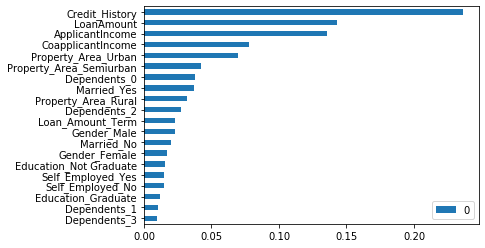

In [58]:
pd.DataFrame(rf.feature_importances_, index=xtrain.columns).sort_values(by=0).plot(kind="barh")
plt.show()

In [59]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()

In [60]:
pred_adab=adab.fit(xtrain_reset,ytrain_reset).predict(xtest_reset)

In [63]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef

In [64]:
print("The Accuracy Score is",accuracy_score(ytest_reset,pred_adab))
print("The Kappa Score is",cohen_kappa_score(ytest_reset,pred_adab))
print("The mathews Score is",matthews_corrcoef(ytest_reset,pred_adab))

The Accuracy Score is 0.8026315789473685
The Kappa Score is 0.6052631578947368
The mathews Score is 0.6191391873668903
